In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
from OneVsAllLogisticRegression import *
from NeuralNetwork import *

In [2]:
mat = scipy.io.loadmat('Datasets/ex4data1.mat')

In [3]:
X = mat['X']
y = mat['y'].ravel()
y[y == 10] = 0

In [4]:
n = 100 
index = np.random.choice(X.shape[0], n, replace=False) 
sel = X[index,:]

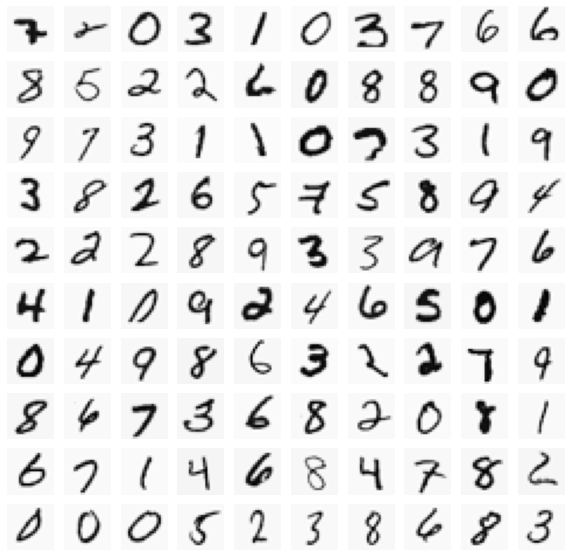

In [5]:

regOneVsall = OneVsall()
regOneVsall.displaydata(sel)

In [6]:
Weights = scipy.io.loadmat('datasets/ex4weights.mat')

In [7]:
theta1 = Weights.get("Theta1")
theta2 = Weights.get("Theta2")
theta2 = np.roll(theta2, 1, axis=0)
nn_params = np.concatenate([theta1.ravel(),theta2.ravel()])
nn_params.shape

(10285,)

In [9]:
Weights = scipy.io.loadmat('datasets/ex4weights.mat')

In [10]:
theta1 = Weights.get('Theta1')
theta2 = Weights.get('Theta2')
theta2 = np.roll(theta2, 1, axis=0)
nn_params = np.concatenate([theta1.ravel(), theta2.ravel()])
nn_params.shape

(10285,)

In [11]:
#Defining layers and labels

input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [12]:
FF = NeuralNetwork()

In [13]:
#Computing Cost function for Neural Network with Lambda = 0

J = FF.nncostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=0.0)
J

(0.28762916516131876,
 array([6.18712766e-05, 0.00000000e+00, 0.00000000e+00, ...,
        5.00631408e-04, 1.13453370e-03, 1.35707295e-03]))

In [14]:
J = FF.nncostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=1)
J

(0.3837698590909235,
 array([ 6.18712766e-05, -2.11248326e-12,  4.38829369e-13, ...,
         4.56012778e-04,  8.53649429e-04,  9.30689893e-04]))

In [15]:
#Computing Sigmoid Gradient for calculating Backpropagation

SG = FF.sigmoidGradient(np.array([-1,0]))
SG

array([0.19661193, 0.25      ])

In [17]:
#Implementing BackPropagation

grad = FF.BackPropagation(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=1)

In [19]:
#Initializing randInitializeWeights

initial_Theta1 = FF.randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = FF.randInitializeWeights(hidden_layer_size, num_labels);

initial_nn_params = np.concatenate([initial_Theta1.ravel(),initial_Theta2.ravel()],axis = 0)
initial_nn_params.shape

(10285,)

In [20]:
FF.checkNNGradients(FF.nncostfunction)

numgrad (38,)
grad (38,)
[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978931e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146356e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149705e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883213e-05  3.69883234e-05]
 [ 3.35320347e-04  3.35320347e-04]
 [ 1.53247079e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759764e-05 -4.68759769e-05]
 [-3.76215588e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736493e-02  5.75736493e

In [23]:
#Implementing Gradient Descent Check for verifying BackPropagation with Regularization

lambda_ = 3
FF.checkNNGradients(FF.nncostfunction, lambda_)

# Also output the costFunction debugging values
debug_J, _  = FF.nncostfunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lambda_)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

numgrad (38,)
grad (38,)
[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 3.81928666e-05  3.81928696e

In [24]:
#Optimize using scipy minimizer

from scipy import optimize

options = {'maxiter' : 100}

#  You should also try different values of lambda
lambda_ = 1


# Create "short hand" for the cost function to be minimized
costFunction = lambda p: FF.nncostfunction(p, input_layer_size,
                                          hidden_layer_size,
                                          num_labels, X, y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                       initial_nn_params,
                       jac=True,
                       method='TNC',
                       options=options)

# get the solution of the optimization
nn_params = res.x

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                   (num_labels, (hidden_layer_size + 1)))

In [25]:
#Prediction

pred = FF.predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 95.200000
